# Análisis Exploratorio


--- daily-total-female-births.csv ---


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None



,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


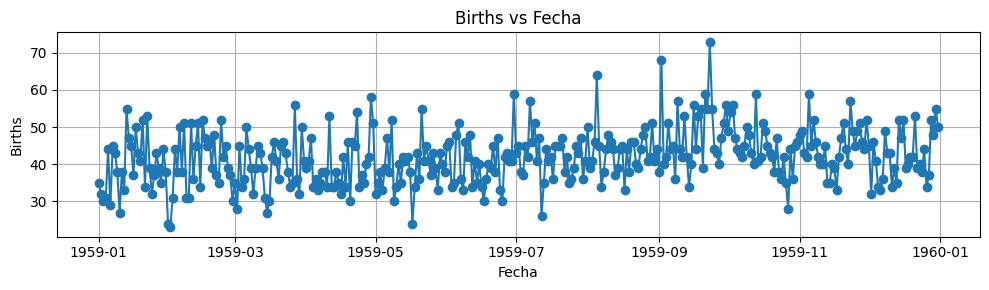

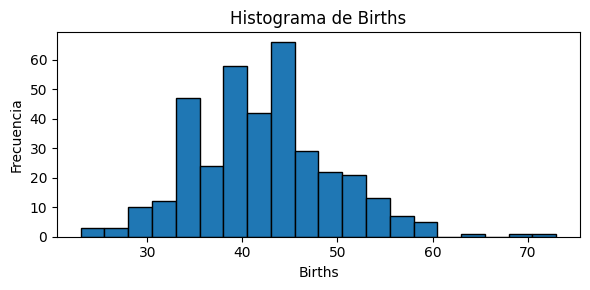

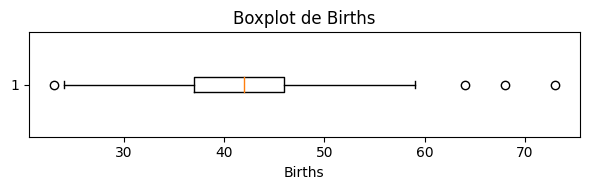

<Figure size 600x300 with 0 Axes>

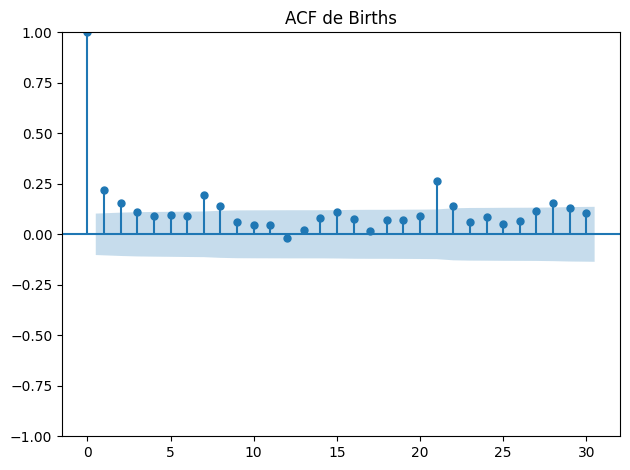


--- shampoo.csv ---


C:\Users\Eduar\AppData\Local\Temp\ipykernel_17664\2731018336.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)


,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes
None



,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


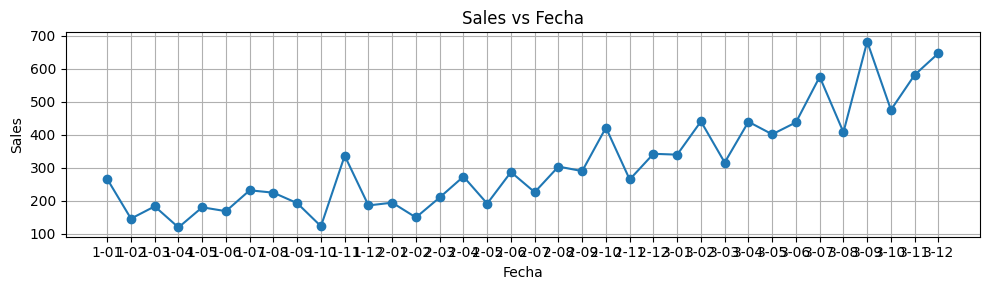

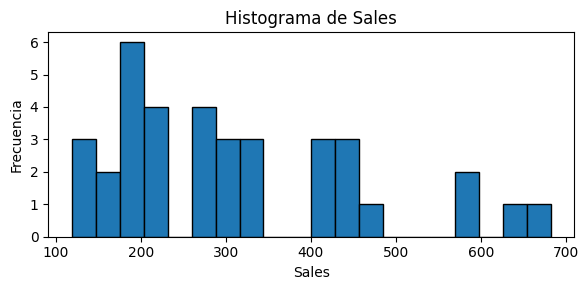

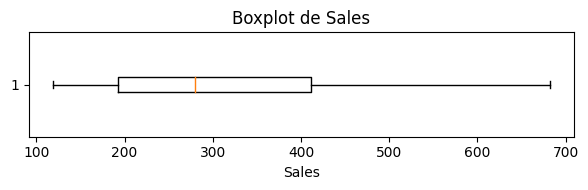

<Figure size 600x300 with 0 Axes>

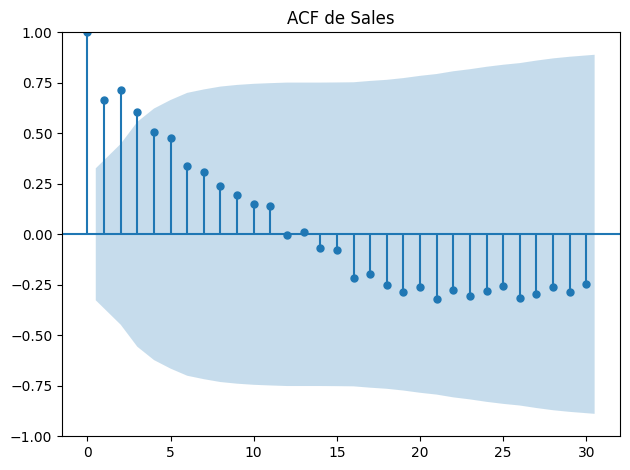


--- monthly-mean-temp.csv ---


,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None



,Temperature
count,240.000000
mean,49.041250
std,8.569705
min,31.300000
25%,41.550000
50%,47.350000
75%,57.000000
max,66.500000


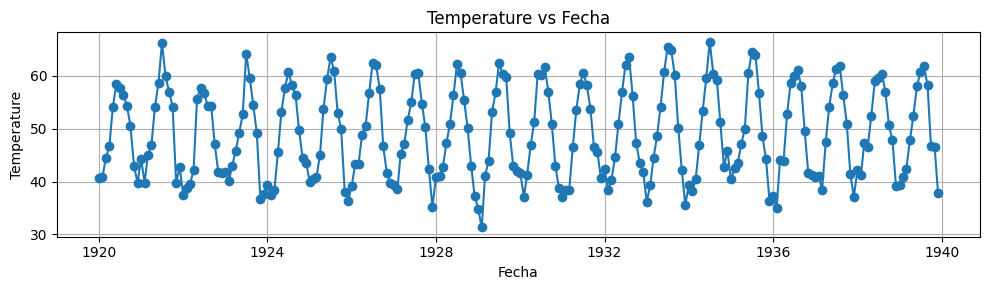

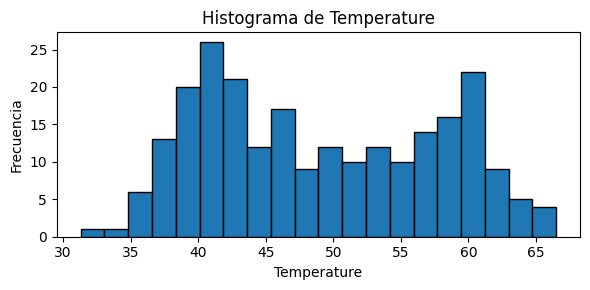

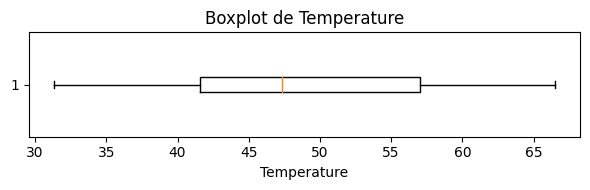

<Figure size 600x300 with 0 Axes>

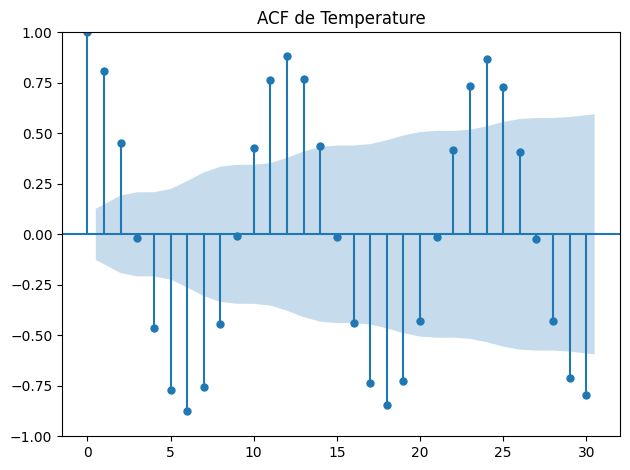


--- monthly-car-sales.csv ---


,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1960-01-01 to 1968-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   108 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None



,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


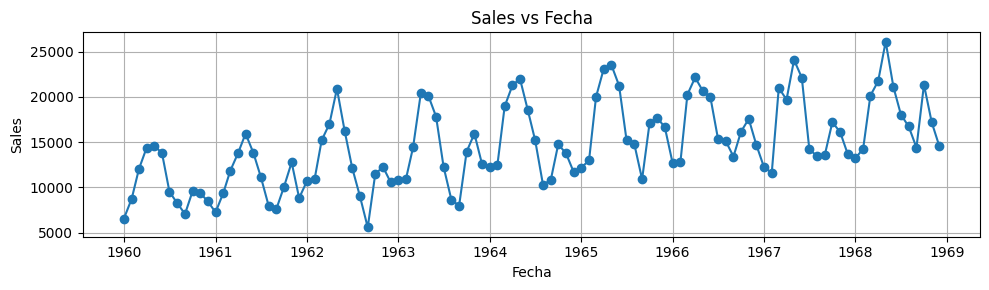

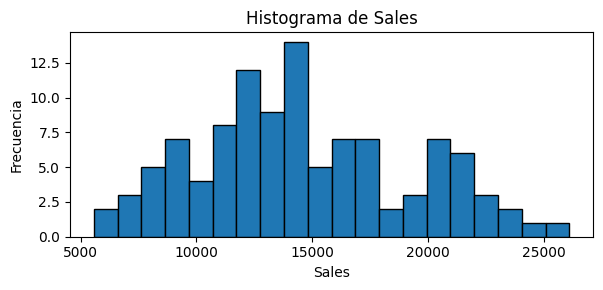

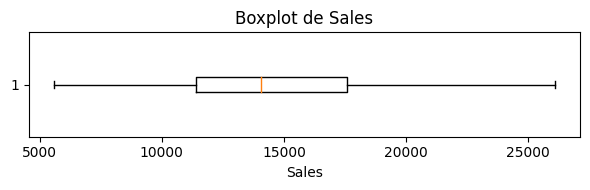

<Figure size 600x300 with 0 Axes>

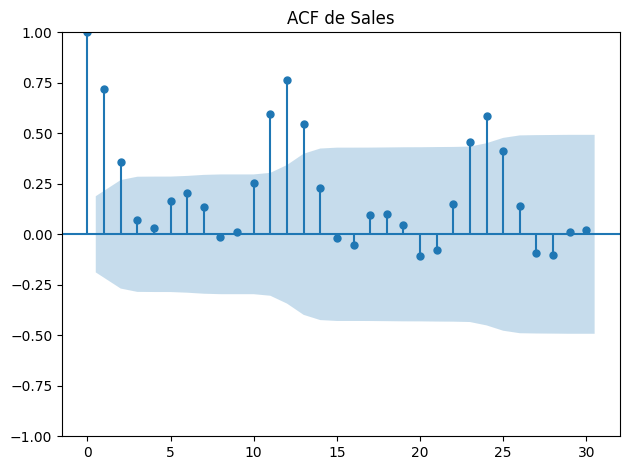

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

def eda_series(filepath, date_col, value_col, freq=None):

    df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)
    if freq:
        df = df.asfreq(freq)
    
    print(f"\n--- {filepath} ---")
    display(df.head())
    print(df.info(), end="\n\n")
    display(df.describe())
    
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df[value_col], marker='o', linestyle='-')
    plt.title(f"{value_col} vs Fecha")
    plt.xlabel("Fecha")
    plt.ylabel(value_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plt.hist(df[value_col].dropna(), bins=20, edgecolor='k')
    plt.title(f"Histograma de {value_col}")
    plt.xlabel(value_col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 2))
    plt.boxplot(df[value_col].dropna(), vert=False)
    plt.title(f"Boxplot de {value_col}")
    plt.xlabel(value_col)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plot_acf(df[value_col].dropna(), lags=30)
    plt.title(f"ACF de {value_col}")
    plt.tight_layout()
    plt.show()


series = [
    ("daily-total-female-births.csv", "Date",        "Births"),
    ("shampoo.csv",               "Month",       "Sales"),
    ("monthly-mean-temp.csv",     "Month",       "Temperature"),
    ("monthly-car-sales.csv",     "Month",       "Sales"),
]

for fp, dtc, valc in series:
    eda_series(fp, dtc, valc, fq)


# Promedios Móviles

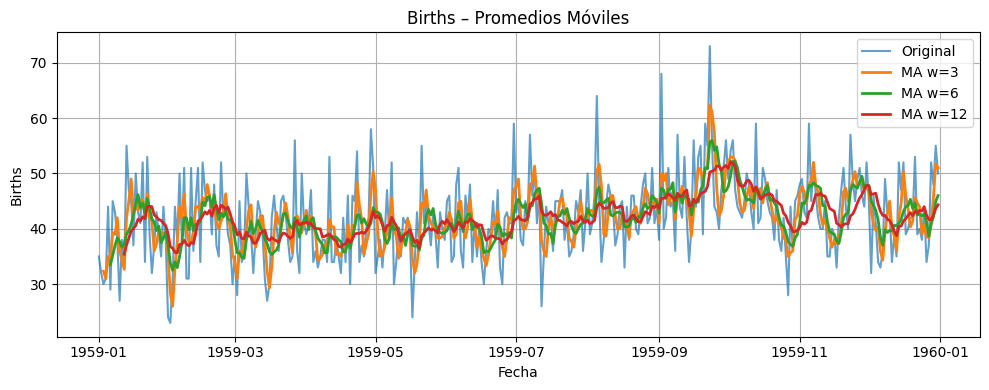

C:\Users\Eduar\AppData\Local\Temp\ipykernel_17664\611152053.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)


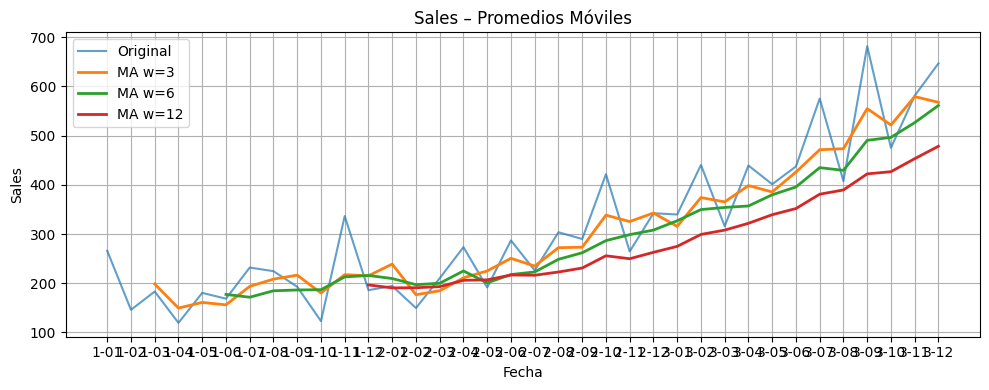

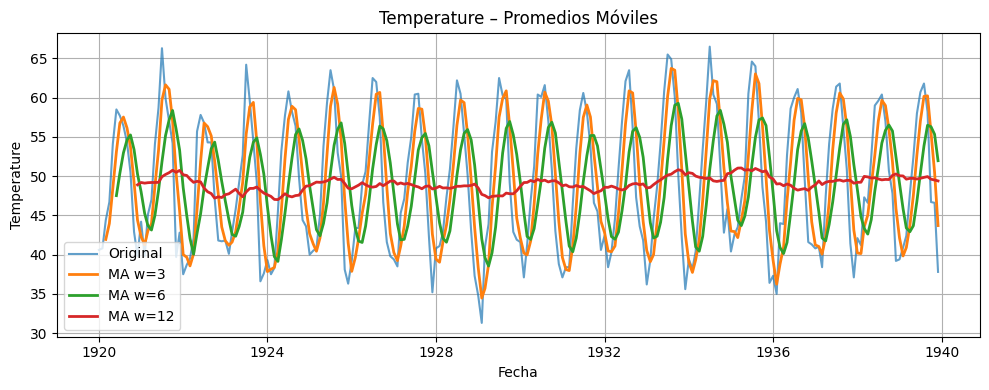

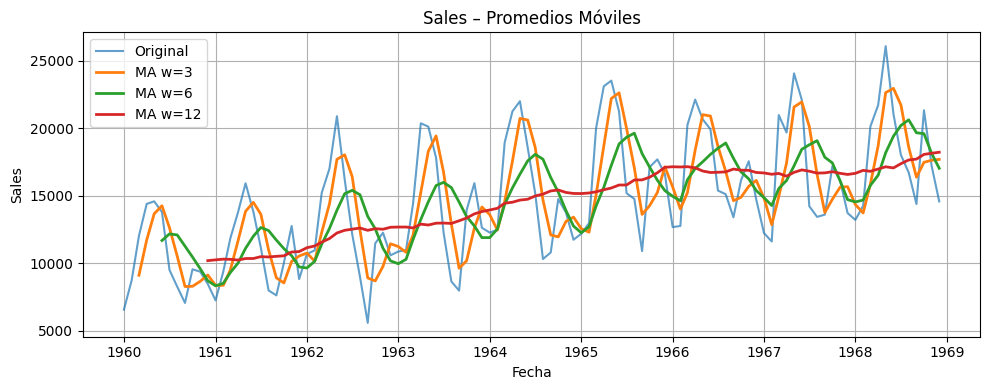

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

series = [
    ("daily-total-female-births.csv", "Date",        "Births"),
    ("shampoo.csv",               "Month",       "Sales"),
    ("monthly-mean-temp.csv",     "Month",       "Temperature"),
    ("monthly-car-sales.csv",     "Month",       "Sales"),
]

ventanas = [3, 6, 12]

for filepath, date_col, value_col in series:
    df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)

    for w in ventanas:
        df[f"MA_{w}"] = df[value_col].rolling(window=w).mean()

    plt.figure(figsize=(10, 4))
    plt.plot(df[value_col], label="Original", alpha=0.7)
    for w in ventanas:
        plt.plot(df[f"MA_{w}"], label=f"MA w={w}", linewidth=2)
    
    plt.title(f"{value_col} – Promedios Móviles")
    plt.xlabel("Fecha")
    plt.ylabel(value_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Alisamiento Exponencial y holt Winters

C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


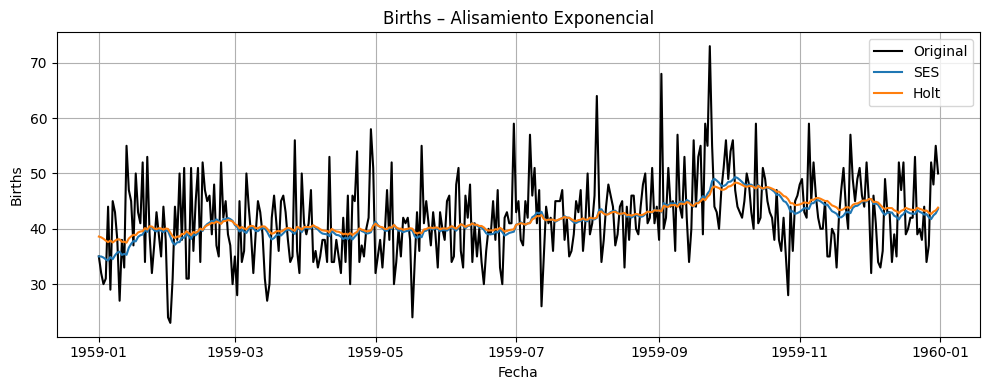


Errores en 'Births':
  SES      RMSE=7.07, MAE=5.59
  Holt     RMSE=7.04, MAE=5.58

------------------------------------------------------------



C:\Users\Eduar\AppData\Local\Temp\ipykernel_17664\3371252764.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-pack

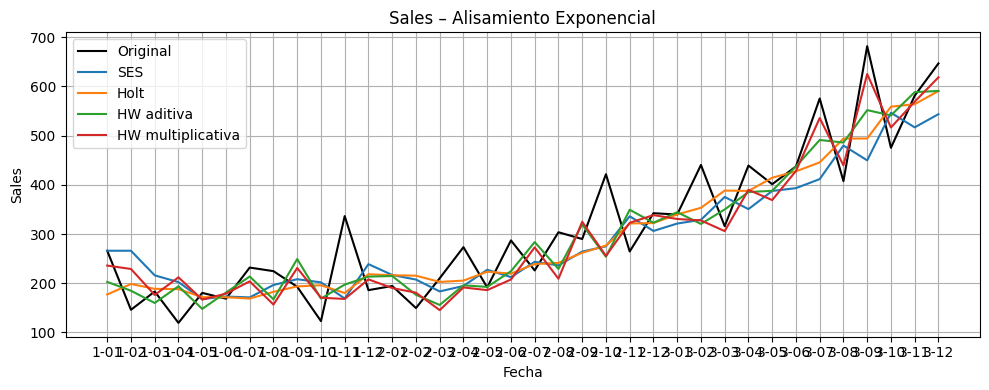


Errores en 'Sales':
  SES      RMSE=82.94, MAE=65.58
  Holt     RMSE=71.21, MAE=54.96
  HW_add   RMSE=66.21, MAE=53.18
  HW_mul   RMSE=62.64, MAE=47.59

------------------------------------------------------------



C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


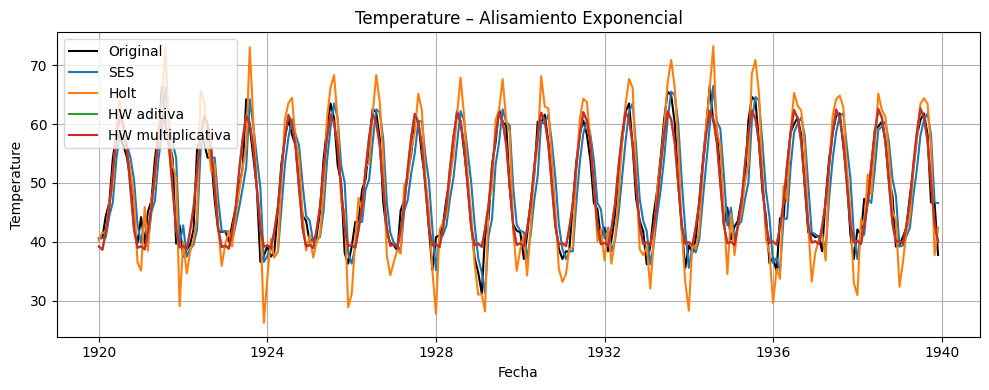


Errores en 'Temperature':
  SES      RMSE=5.22, MAE=4.30
  Holt     RMSE=5.06, MAE=4.01
  HW_add   RMSE=2.23, MAE=1.74
  HW_mul   RMSE=2.22, MAE=1.74

------------------------------------------------------------



C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

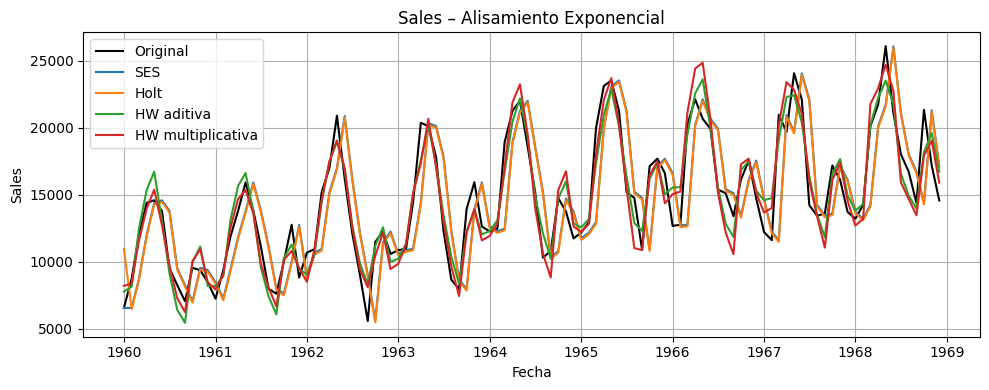


Errores en 'Sales':
  SES      RMSE=3300.84, MAE=2609.60
  Holt     RMSE=3332.69, MAE=2645.09
  HW_add   RMSE=1432.71, MAE=1154.36
  HW_mul   RMSE=1477.77, MAE=1161.19

------------------------------------------------------------



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

series = [
    ("daily-total-female-births.csv", "Date",        "Births",      None),
    ("shampoo.csv",               "Month",       "Sales",       12),
    ("monthly-mean-temp.csv",     "Month",       "Temperature", 12),
    ("monthly-car-sales.csv",     "Month",       "Sales",       12),
]

for filepath, date_col, value_col, season in series:
    df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)
    
    ses = SimpleExpSmoothing(df[value_col]).fit(optimized=True)
    df['SES'] = ses.fittedvalues

    holt = ExponentialSmoothing(df[value_col], trend='add', seasonal=None) \
           .fit(optimized=True)
    df['Holt'] = holt.fittedvalues

    if season:
        hw_add = ExponentialSmoothing(df[value_col],
                                      trend='add',
                                      seasonal='add',
                                      seasonal_periods=season) \
                 .fit(optimized=True)
        df['HW_add'] = hw_add.fittedvalues
        
        hw_mul = ExponentialSmoothing(df[value_col],
                                      trend='add',
                                      seasonal='mul',
                                      seasonal_periods=season) \
                 .fit(optimized=True)
        df['HW_mul'] = hw_mul.fittedvalues

    # 3. Graficar resultados
    plt.figure(figsize=(10, 4))
    plt.plot(df[value_col], label='Original', color='black')
    plt.plot(df['SES'],   label='SES')
    plt.plot(df['Holt'],  label='Holt')
    if season:
        plt.plot(df['HW_add'], label='HW aditiva')
        plt.plot(df['HW_mul'], label='HW multiplicativa')
    plt.title(f"{value_col} – Alisamiento Exponencial")
    plt.xlabel("Fecha")
    plt.ylabel(value_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nErrores en '{value_col}':")
    methods = ['SES','Holt'] + (['HW_add','HW_mul'] if season else [])
    for m in methods:
        rmse = np.sqrt(mean_squared_error(df[value_col], df[m]))
        mae  = mean_absolute_error(df[value_col], df[m])
        print(f"  {m:<8} RMSE={rmse:.2f}, MAE={mae:.2f}")
    print("\n" + "-"*60 + "\n")


# Holt-Winters

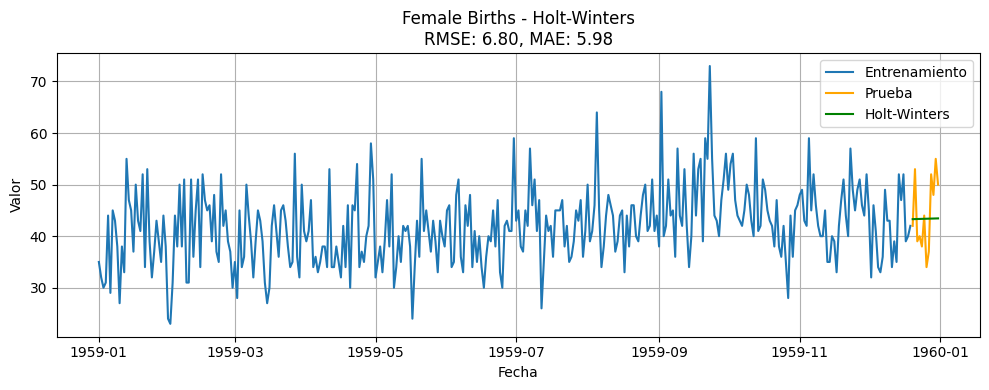

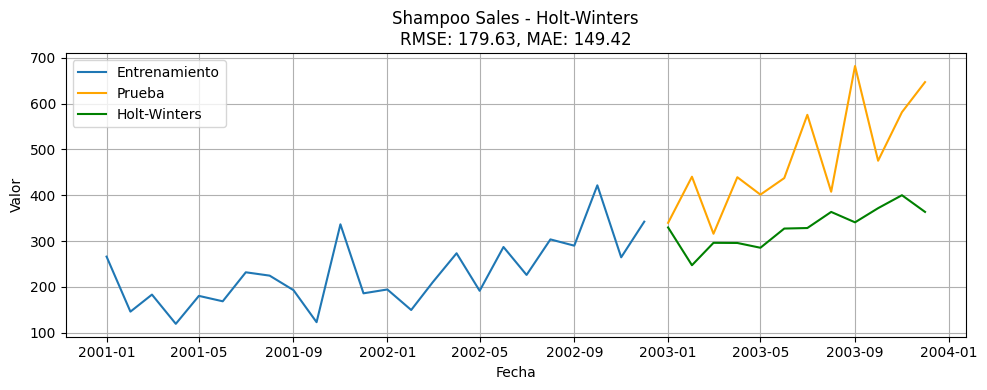

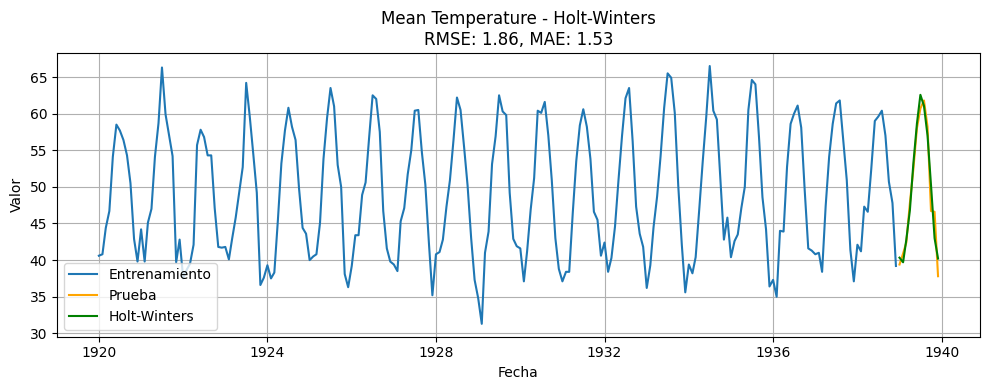

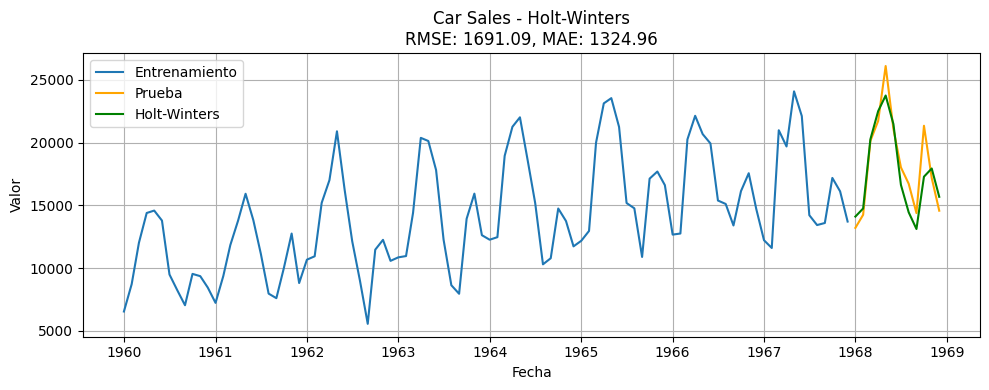


Resumen Holt-Winters:

            Dataset  Tendencia Estacionalidad         RMSE          MAE
0     Female Births       True           None     6.799523     5.975452
1     Shampoo Sales       True            add   179.634201   149.424658
2  Mean Temperature       True            add     1.857328     1.526540
3         Car Sales       True            add  1691.088548  1324.960229


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

births = pd.read_csv('daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')
shampoo_raw = pd.read_csv('shampoo.csv')
shampoo_raw.columns = ['Month', 'value']
shampoo_raw['Month'] = shampoo_raw['Month'].apply(lambda x: f"200{int(x.split('-')[0])}-{x.split('-')[1]}")
shampoo_raw['Month'] = pd.to_datetime(shampoo_raw['Month'], format='%Y-%m')
shampoo = shampoo_raw.set_index('Month').asfreq('MS')

temperature = pd.read_csv('monthly-mean-temp.csv', parse_dates=['Month'], index_col='Month')
car_sales = pd.read_csv('monthly-car-sales.csv', parse_dates=['Month'], index_col='Month')

births.columns = ['value']
shampoo.columns = ['value']
temperature.columns = ['value']
car_sales.columns = ['value']

def aplicar_holt_winters(nombre, serie, frecuencia, tendencia=True, estacional=True, estacionalidad='add', periodo_estacional=12):
    serie = serie.asfreq(frecuencia)
    train = serie.iloc[:-12]
    test = serie.iloc[-12:]

    # Configurar el modelo
    model = ExponentialSmoothing(
        train,
        trend='add' if tendencia else None,
        seasonal=estacionalidad if estacional else None,
        seasonal_periods=periodo_estacional
    ).fit()

    pred = model.forecast(12)
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)

    # Visualización
    plt.figure(figsize=(10, 4))
    plt.plot(train.index, train, label='Entrenamiento')
    plt.plot(test.index, test, label='Prueba', color='orange')
    plt.plot(test.index, pred, label='Holt-Winters', color='green')
    plt.title(f"{nombre} - Holt-Winters\nRMSE: {rmse:.2f}, MAE: {mae:.2f}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'Dataset': nombre,
        'Tendencia': tendencia,
        'Estacionalidad': estacionalidad if estacional else None,
        'RMSE': rmse,
        'MAE': mae
    }

# Aplicar Holt-Winters
resultados_hw = []
resultados_hw.append(aplicar_holt_winters("Female Births", births, 'D', tendencia=True, estacional=False))
resultados_hw.append(aplicar_holt_winters("Shampoo Sales", shampoo, 'MS', tendencia=True, estacional=True, estacionalidad='add', periodo_estacional=12))
resultados_hw.append(aplicar_holt_winters("Mean Temperature", temperature, 'MS', tendencia=True, estacional=True, estacionalidad='add', periodo_estacional=12))
resultados_hw.append(aplicar_holt_winters("Car Sales", car_sales, 'MS', tendencia=True, estacional=True, estacionalidad='add', periodo_estacional=12))

# Mostrar resumen
df_resultados_hw = pd.DataFrame(resultados_hw)
print("\nResumen Holt-Winters:\n")
print(df_resultados_hw)


# Sarima:

/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2383.625, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2566.215, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2483.148, Time=0.10 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2378.710, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2564.216, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2383.135, Time=0.03 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2380.697, Time=0.21 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2380.691, Time=0.78 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2378.782, Time=0.12 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2382.521, Time=1.64 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2566.938, Time=0.05 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2378.026, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2380.503, Time=0.07 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2379.954, Time=0.29 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=2379.913, Time=1.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2377.957, Time=0.16 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2379.953, Time=0.62 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2381.955, Time=0.65 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2379.629, Time=0.29 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2379.675, Time=0.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2566.824, Time=0.05 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2378.159, Time=0.12 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2453.591, Time=0.21 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2381.625, Time=0.49 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=2376.427, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=2379.148, Time=0.02 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12]             : AIC=2378.423, Time=0.25 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=2378.425, Time=0.19 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=2376.502, Time=0.16 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[12]             : AIC=2380.427, Time=0.32 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2377.124, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=2481.151, Time=0.07 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=2378.151, Time=0.15 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=2378.204, Time=0.23 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=2564.825, Time=0.03 sec
 ARIMA(0,1,2)(1,0,0)[12]             : AIC=2376.607, Time=0.08 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=2451.597, Time=0.06 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12]             : AIC=2380.142, Time=0.36 sec

Best model:  ARIMA(1,1,1)(1,0,0)[12]          
Total fit time: 11.442 seconds


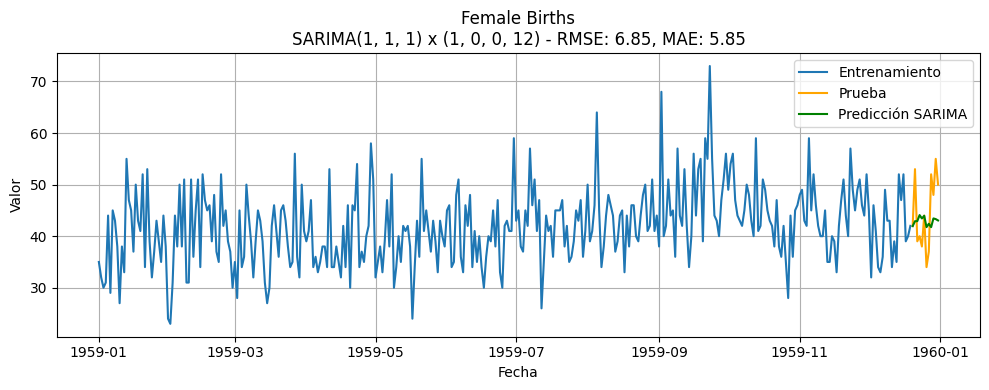

/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=276.144, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=262.408, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=274.175, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=264.865, Time=0.01 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=266.212, Time=0.28 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=271.857, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=262.694, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=260.295, Time=0.11 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.08 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=262.236, Time=0.57 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=262.144, Time=1.18 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.83 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=263.973, Time=1.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.10 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=260.741, Time=0.13 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=263.028, Time=0.03 sec

Best model:  ARIMA(1,1,1)(1,0,0)[12] intercept
Total fit time: 5.897 seconds


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


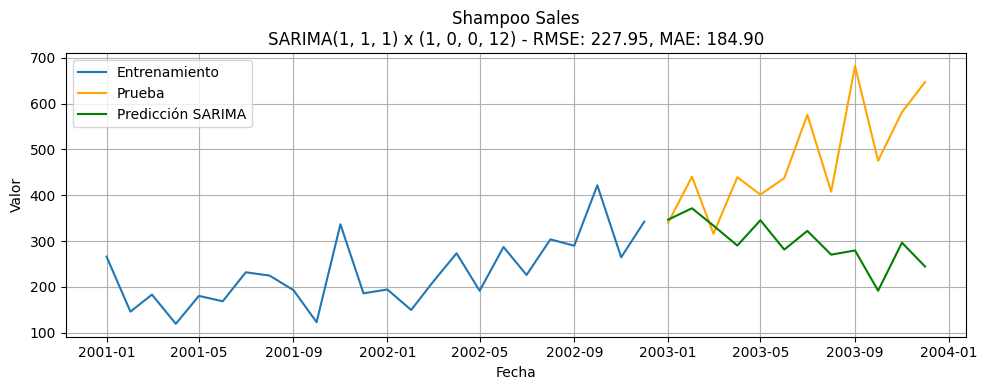

/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.36 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1630.507, Time=0.02 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1214.924, Time=1.28 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1385.756, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2430.778, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1386.954, Time=0.02 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.36 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1327.338, Time=0.09 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1078.545, Time=2.24 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=1081.132, Time=2.02 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1085.660, Time=1.20 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.99 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=1100.442, Time=1.15 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=1081.725, Time=1.29 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.37 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.92 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12]             : AIC=inf, Time=nan sec

Best model:  ARIMA(1,0,0)(2,0,1)[12] intercept
Total fit time: 22.880 seconds


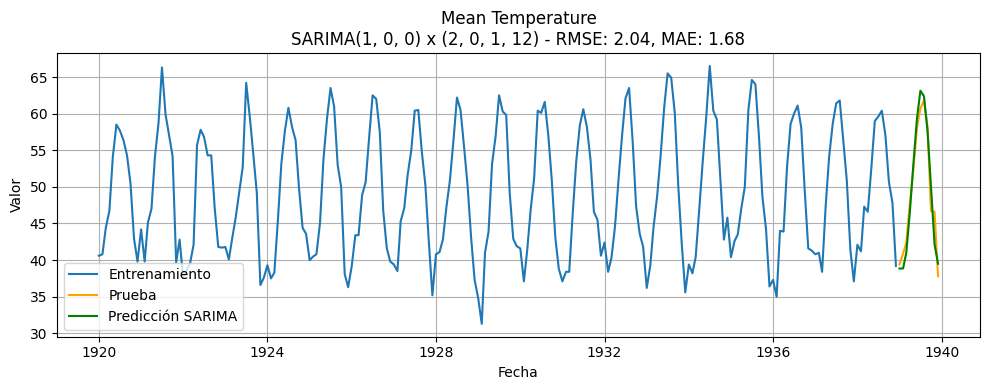

/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1497.926, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1490.829, Time=0.06 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1493.469, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1515.961, Time=0.00 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1494.550, Time=0.02 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1490.946, Time=0.46 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1492.825, Time=0.45 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1491.181, Time=0.16 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1492.534, Time=0.61 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1496.679, Time=0.08 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1488.795, Time=0.25 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1493.029, Time=0.03 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1489.062, Time=0.57 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=1489.604, Time=0.97 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=1488.782, Time=0.63 sec
 ARIMA(2,0,0)(0,1,2)[12] intercept   : AIC=1488.024, Time=0.18 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,2)[12] intercept   : AIC=1489.802, Time=0.31 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1490.044, Time=0.12 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,1,2)[12] intercept   : AIC=1489.734, Time=0.21 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=1489.572, Time=0.35 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1490.754, Time=0.24 sec


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,1,2)[12] intercept   : AIC=1491.547, Time=0.58 sec
 ARIMA(2,0,0)(0,1,2)[12]             : AIC=1490.758, Time=0.19 sec

Best model:  ARIMA(2,0,0)(0,1,2)[12] intercept
Total fit time: 7.941 seconds


/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


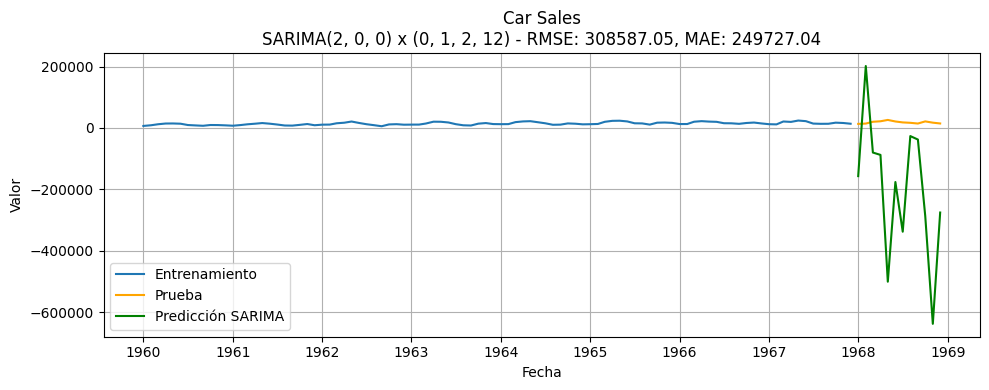


Resumen de Resultados SARIMA:

            Dataset      Orden Orden Estacional           RMSE            MAE
0     Female Births  (1, 1, 1)    (1, 0, 0, 12)       6.853790       5.853421
1     Shampoo Sales  (1, 1, 1)    (1, 0, 0, 12)     227.948209     184.901362
2  Mean Temperature  (1, 0, 0)    (2, 0, 1, 12)       2.043900       1.678400
3         Car Sales  (2, 0, 0)    (0, 1, 2, 12)  308587.049671  249727.043276


In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Función para aplicar SARIMA
def aplicar_modelo_sarima(nombre, serie, frecuencia):
    serie = serie.asfreq(frecuencia)
    train = serie.iloc[:-12]
    test = serie.iloc[-12:]
    
    # Auto ARIMA para detectar parámetros
    modelo_auto = auto_arima(train,
                              seasonal=True,
                              m=12,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)
    
    orden = modelo_auto.order
    orden_seasonal = modelo_auto.seasonal_order
    
    modelo = SARIMAX(train,
                     order=orden,
                     seasonal_order=orden_seasonal,
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit(disp=False)
    
    pred = modelo.predict(start=test.index[0], end=test.index[-1])
    
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    
    plt.figure(figsize=(10, 4))
    plt.plot(train.index, train, label="Entrenamiento")
    plt.plot(test.index, test, label="Prueba", color="orange")
    plt.plot(test.index, pred, label="Predicción SARIMA", color="green")
    plt.title(f"{nombre}\nSARIMA{orden} x {orden_seasonal} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return {
        'Dataset': nombre,
        'Orden': orden,
        'Orden Estacional': orden_seasonal,
        'RMSE': rmse,
        'MAE': mae
    }

# 4 datasets
resultados = []
resultados.append(aplicar_modelo_sarima("Female Births", births, 'D'))
resultados.append(aplicar_modelo_sarima("Shampoo Sales", shampoo, 'MS'))
resultados.append(aplicar_modelo_sarima("Mean Temperature", temperature, 'MS'))
resultados.append(aplicar_modelo_sarima("Car Sales", car_sales, 'MS'))

# Mostrar resumen
df_resultados = pd.DataFrame(resultados)
print("\nResumen de Resultados SARIMA:\n")
print(df_resultados)


# Prophet

/Users/alexismesias/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
19:41:49 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing


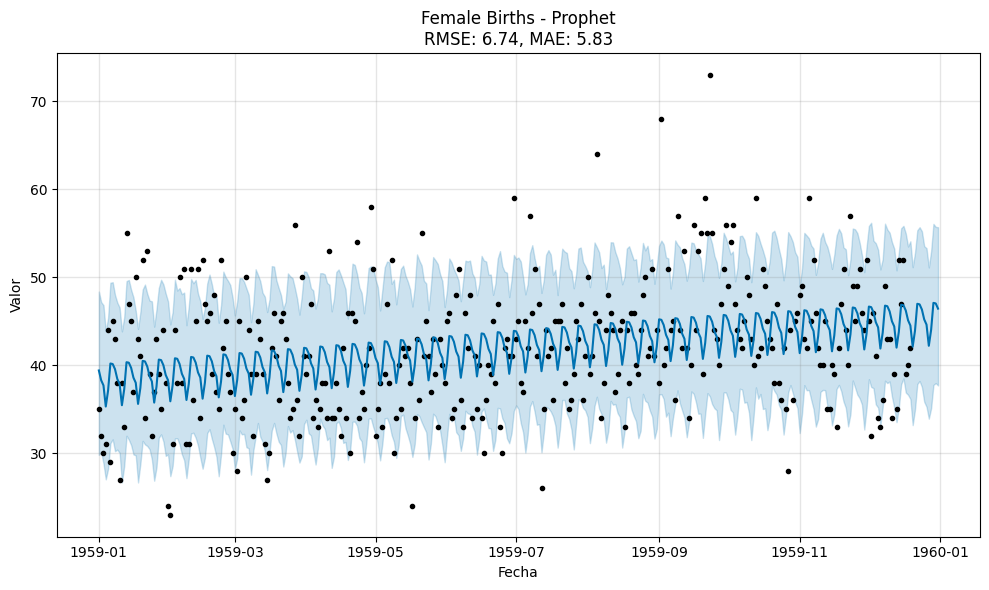

19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing


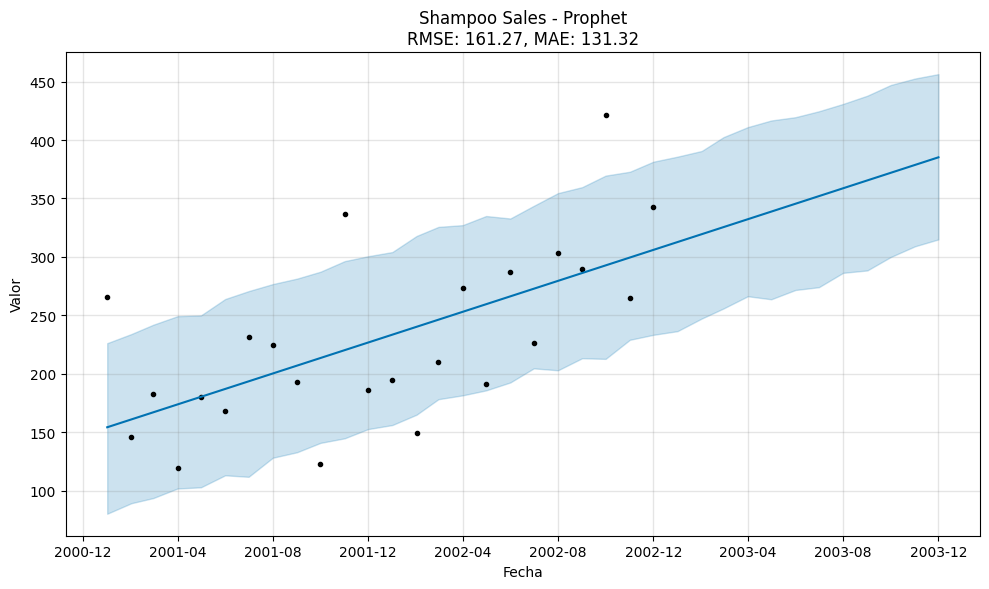

19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing


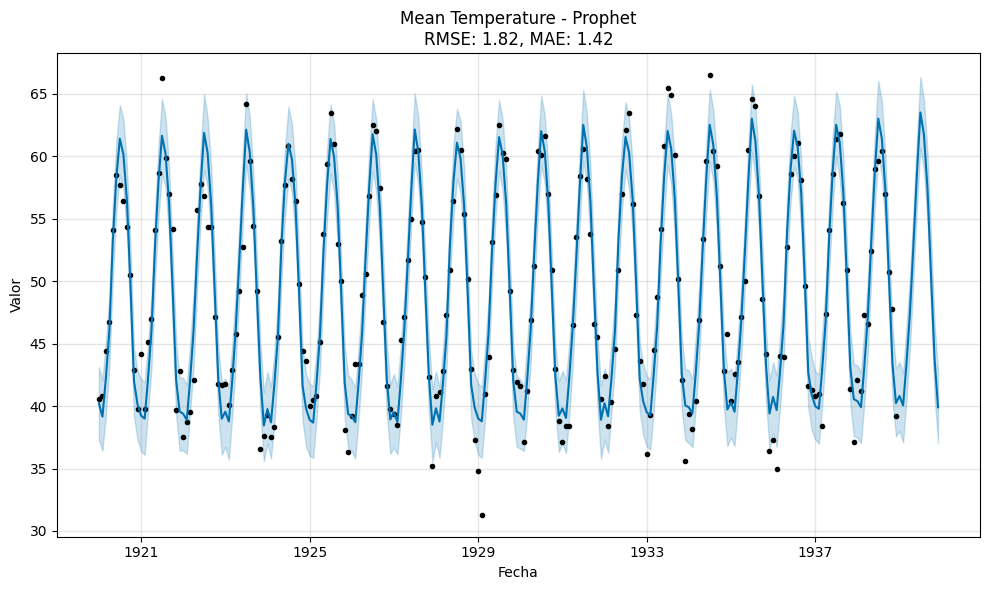

19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing


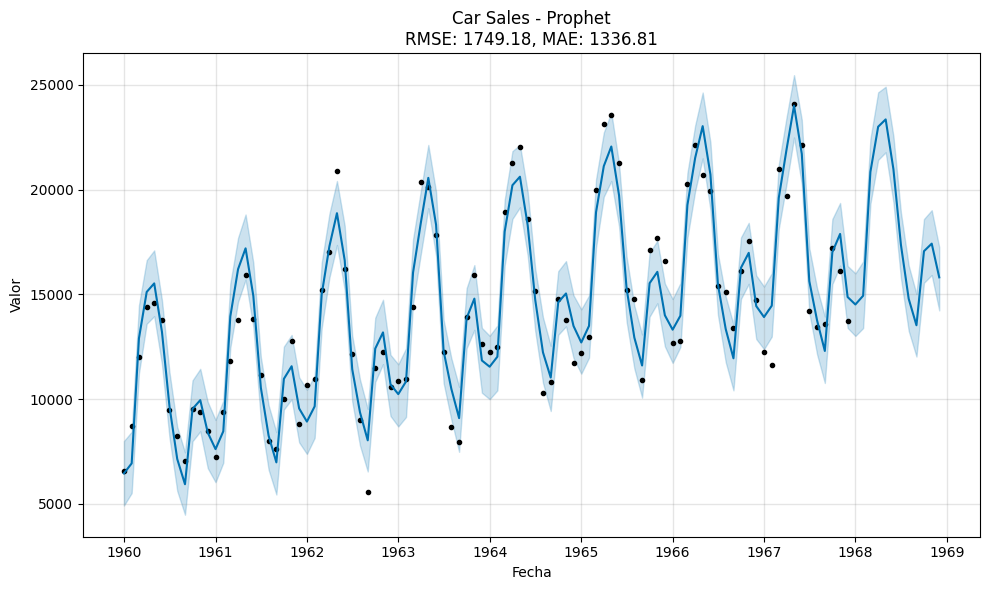


Resumen Prophet:

            Dataset         RMSE          MAE
0     Female Births     6.744506     5.825456
1     Shampoo Sales   161.267888   131.319954
2  Mean Temperature     1.824453     1.417934
3         Car Sales  1749.183863  1336.813024


In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Función para aplicar Prophet
def aplicar_prophet(nombre, serie):
    # Formatear columnas como requiere Prophet
    df = serie.reset_index()
    df.columns = ['ds', 'y']
    
    train = df[:-12]
    test = df[-12:]
    
    modelo = Prophet()
    modelo.fit(train)

    futuro = modelo.make_future_dataframe(periods=12, freq=serie.index.freq)
    
    forecast = modelo.predict(futuro)
    
    # Filtrar
    y_pred = forecast.iloc[-12:]['yhat'].values
    y_true = test['y'].values

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # Visualización
    modelo.plot(forecast)
    plt.title(f"{nombre} - Prophet\nRMSE: {rmse:.2f}, MAE: {mae:.2f}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return {
        'Dataset': nombre,
        'RMSE': rmse,
        'MAE': mae
    }

# Preparar las series
# Asegurar frecuencia
births = births.asfreq('D')
shampoo = shampoo.asfreq('MS')
temperature = temperature.asfreq('MS')
car_sales = car_sales.asfreq('MS')

# Aplicar Prophet
resultados_prophet = []
resultados_prophet.append(aplicar_prophet("Female Births", births))
resultados_prophet.append(aplicar_prophet("Shampoo Sales", shampoo))
resultados_prophet.append(aplicar_prophet("Mean Temperature", temperature))
resultados_prophet.append(aplicar_prophet("Car Sales", car_sales))

# Mostrar resumen
df_resultados_prophet = pd.DataFrame(resultados_prophet)
print("\nResumen Prophet:\n")
print(df_resultados_prophet)
